# Statistische analyse van Utrecht

## Inleiding
asdf

## Aanpak
### Gemiddelde
Het gemiddelde wordt berekend door de som te nemen van alle getallen in een lijst
en door de som door de hoeveelheid getallen te delen.

### Mediaan
De mediaan is het middelste nummer in een gesorteerde rij van getallen.  
Deze wordt berekend door de oorspronkelijke rij te sorteren.
Wanneer er te maken is met een even rij getallen wordt de mediaan het gemiddelde
van de twee middelste getallen.
Bij een oneven rij is de mediaan het middelste getal.

### Modus

### Standaard deviatie

### Trendlijn

## Uitwerking
asdf


In [77]:
import csv
import matplotlib.pyplot as plt
from matplotlib import style

data_dict = {}
columns = {}


def is_number(s):
    """Check if value is of type int"""
    try:
        int(s)
        return True
    except ValueError:
        return False


def data_to_dict(file):
    """"""
    
    with open(file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        
        row_count = 0
        for row in csv_reader:
            if row_count == 0:
                for element in range(0, len(row)):
                    columns[row[element]] = element
                    data_dict[element] = []
                row_count += 1
            
            else:
                if 'JJ00' in str(row):
                    continue
                else:
                    for element in range(0, len(row)):
                        if is_number(row[element]):
                            # the element is an integer
                            data_dict[element].append(int(row[element]))
                        else:
                            # the element is not an integer
                            data_dict[element].append(row[element])

def mean(data_list):
    """Returns the mean value of the list"""
    return sum(data_list) / len(data_list)


def median(data_list):
    """Returns the median of the list"""
    sorted_list = sorted(data_list)
    if len(data_list) % 2 == 0:
        left_middle = sorted_list[len(sorted_list) // 2 - 1]
        right_middle = sorted_list[len(sorted_list) // 2]
        return (left_middle + right_middle) / 2
    else:
        return data_list[len(data_list) // 2]


def mode(data_list):
    """Returns the number that appears the most in the list"""
    number_dict = {}
    # 
    appearance_count = 0
    modus_key = 0
    number_dict[modus_key] = appearance_count
    
    # iterate over every element in the list
    for element in data_list:
        if element in number_dict:
            # 
            number_dict[element] += 1
        else:
            # 
            number_dict[element] = 1

        if number_dict[element] > appearance_count:
            modus_key = element
            appearance_count = number_dict[element]
    return modus_key


def std(data_list):
    """Returns the standard deviation of a list"""
    # get the mean value
    mean_value = mean(data_list)
    
    # calculate for every number the distance from the mean and square it
    diff_distance = []
    for element in data_list:
        diff_distance.append((element - mean_value) * (element - mean_value))
    
    # calculate the mean of all the squared values
    diff_mean = mean(diff_distance)
    
    # square root the mean and return it
    return diff_mean ** 0.5


def best_fit(y_list):
    """Calculate a trendline based on a list of y-values"""
    # 
    n = len(y_list)
    x_list = [x for x in range(1, len(y_list) + 1)]
    
    # initialize the variables
    a, b, c, d = 0, 0, 0, 0
    
    # calculate the values for b and d
    b = sum(x_list) * sum(y_list)
    d = sum(x_list) ** 2
    
    # calculate the values for a and c
    for num in range(0, len(x_list)):
        a += (x_list[num] * y_list[num])
        c += x_list[num] ** 2
    a = a * n
    c = c * n
    
    # calculate the slope
    slope = (a - b) / (c - d)
    
    # calculate the offset
    offset = (sum(y_list) - (slope * sum(x_list))) / n
    
    # calculating the trendline and return it
    trend_line = []
    for point in x_list:
        trend_line.append(point * slope + offset)
    return trend_line


## Plotten van de data

### Openen bestand en opslaan data


In [78]:
file_name = 'utrecht.csv'
data_to_dict(file_name)


## Geboortecijfers Utrecht 2017-2018


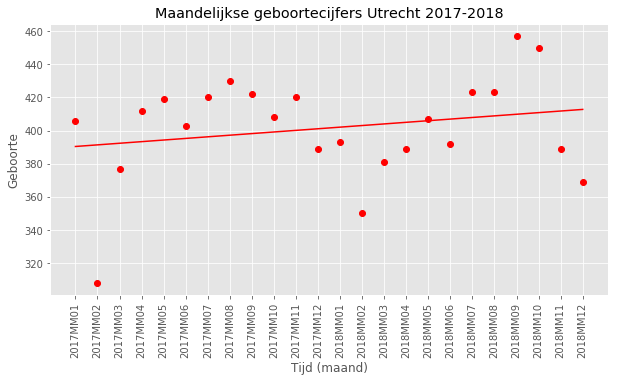

Mean: 401.5416666666667
Median: 406.5
Mode: 389
Standard Deviation: 30.881465809698142


In [79]:
start_month, end_month = -26, -2
y_axis = data_dict[columns['LevendGeborenKinderen_2']][start_month:end_month]
x_axis = data_dict[columns['Perioden']][start_month:end_month]

# setting up the plot
plt.title("Maandelijkse geboortecijfers Utrecht 2017-2018")
plt.xlabel("Tijd (maand)")
plt.ylabel("Geboorte")
style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,5]

# plotting the graph
plt.plot(x_axis, y_axis, 'ro')
plt.plot(best_fit(y_axis), 'r')
plt.xticks(rotation=90)
plt.show()

# printing info about the statistics
print("Mean: {0}\n"
      "Median: {1}\n"
      "Mode: {2}\n"
      "Standard Deviation: {3}".format(mean(y_axis), median(y_axis),
                                       mode(y_axis), std(y_axis)))


## Sterftecijfers Utrecht 2017-2018


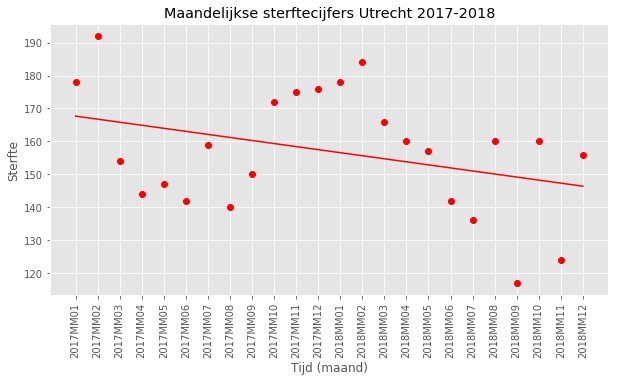

Mean: 157.04166666666666
Median: 158.0
Mode: 160
Standard Deviation: 18.320023577738343


In [81]:
start_month, end_month = -26, -2
y_axis = data_dict[columns['Overledenen_3']][start_month:end_month]
x_axis = data_dict[columns['Perioden']][start_month:end_month]

# setting up the plot
plt.title("Maandelijkse sterftecijfers Utrecht 2017-2018")
plt.xlabel("Tijd (maand)")
plt.ylabel("Sterfte")
style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,5]

# plotting the graph
plt.plot(x_axis, y_axis, 'ro')
plt.plot(best_fit(y_axis), 'r')
plt.xticks(rotation=90)
plt.show()

# printing info about the statistics
print("Mean: {0}\n"
      "Median: {1}\n"
      "Mode: {2}\n"
      "Standard Deviation: {3}".format(mean(y_axis), median(y_axis),
                                       mode(y_axis), std(y_axis)))
